### Initial EDA and Linear Regression Viability
- Data clean up, remove outliers
- Viability analysis (correlation chart, pairplots, reg plot) determined a log transform on the gross (target) and budget (feature) columns would be beneficial.  

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import re
import cpi
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [2]:
#bring data together
batch1 = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/thrillers_1_to_350_year_budget.csv')
batch2 = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/thrillers_351_700rows.csv')
batch3 = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/thrillers_751_1150rows.csv')

all_movies = [batch1, batch2, batch3]

movie_df = pd.concat(all_movies)

In [3]:
movie_df.reset_index(drop=True, inplace=True)

In [4]:
#movie_df

#### Replace current budget column with new, updated column values

In [5]:
all_budget = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/all_data_budgetcol_only.csv')

In [6]:
all_budget.head()

,Title,Budget
0,The Dark Knight,185000000.0
1,The Hunger Games: Catching Fire,130000000.0
2,The Hunger Games,78000000.0
3,Jurassic Park,63000000.0
4,Furious 7,190000000.0


In [7]:
movie_df.loc[:, ['Budget']] = all_budget['Budget']

In [8]:
#27 missing budget values
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1100 non-null   object 
 1   Duration  1100 non-null   object 
 2   Genre     1100 non-null   object 
 3   Rating    1100 non-null   object 
 4   Gross     1100 non-null   float64
 5   Director  1100 non-null   object 
 6   Lead      1100 non-null   object 
 7   Budget    1073 non-null   float64
 8   Year      1100 non-null   object 
dtypes: float64(2), object(7)
memory usage: 77.5+ KB


In [9]:
# shows rows that have null values
# null_data = movie_df[movie_df.isnull().any(axis=1)]
# null_data

In [10]:
#sum of rows with at least one missing data
total_miss = movie_df.isnull().any(axis=1).sum()
total_miss

27

In [11]:
#drop th 27 nulls
movie_df.dropna(subset=['Budget'], inplace=True)

In [12]:
# drop outlier The Curse of Frankenstein 1957
movie_df.drop(index = 1084, inplace = True)

In [13]:
#find original Jaws in 'Title' use 'contains' to find substring in column
# find_jaws = movie_df.loc[movie_df['Title'].str.contains("Jaws", case=False)]
# find_jaws

In [14]:
# drop outlier Jaws 1975 - Jaws is a complete unique phenomenon that would distort charts
#movie_df.drop(index = 14, inplace = True)

#### Clean up

In [15]:
#remove any leading/trailing in column titles
movie_df.columns = movie_df.columns.map(str.strip)
#movie_df

In [16]:
# Duration cleanup + change to float
movie_df['Duration'] = movie_df['Duration'].str.replace('min', '').astype(float)

In [17]:
movie_df['Budget'] = movie_df['Budget'].astype(float)

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
# Cast year as string to remove extra chars in front of some columns year
movie_df['Year'] = movie_df['Year'].astype(str)

In [20]:
movie_df['Duration'] = movie_df['Duration'].astype(int)

In [21]:
movie_df.head()

,Title,Duration,Genre,Rating,Gross,Director,Lead,Budget,Year
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534.86,Christopher Nolan,Christian Bale,185000000.0,2008
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424.67,Francis Lawrence,Jennifer Lawrence,130000000.0,2013
2,The Hunger Games,142,"Action, Adventure, Sci-Fi",PG-13,408.01,Gary Ross,Jennifer Lawrence,78000000.0,2012
3,Jurassic Park,127,"Action, Adventure, Sci-Fi",PG-13,402.45,Steven Spielberg,Sam Neill,63000000.0,1993
4,Furious 7,137,"Action, Crime, Thriller",PG-13,353.01,James Wan,Vin Diesel,190000000.0,2015


#### Clean up extra chars in year 

In [22]:
# remove extra chars in year column
def my_function(x):
    return x[-4:]
#saves over the column
movie_df['Year'] = movie_df['Year'].map(my_function)       

In [23]:
pd.set_option('display.max_rows', None)
movie_df

,Title,Duration,Genre,Rating,Gross,Director,Lead,Budget,Year
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534.86,Christopher Nolan,Christian Bale,185000000.0,2008
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424.67,Francis Lawrence,Jennifer Lawrence,130000000.0,2013
2,The Hunger Games,142,"Action, Adventure, Sci-Fi",PG-13,408.01,Gary Ross,Jennifer Lawrence,78000000.0,2012
3,Jurassic Park,127,"Action, Adventure, Sci-Fi",PG-13,402.45,Steven Spielberg,Sam Neill,63000000.0,1993
4,Furious 7,137,"Action, Crime, Thriller",PG-13,353.01,James Wan,Vin Diesel,190000000.0,2015
5,The Hunger Games: Mockingjay - Part 1,123,"Action, Adventure, Sci-Fi",PG-13,337.14,Francis Lawrence,Jennifer Lawrence,125000000.0,2014
6,Joker,122,"Crime, Drama, Thriller",R,335.45,Todd Phillips,Joaquin Phoenix,55000000.0,2019
7,Skyfall,143,"Action, Adventure, Thriller",PG-13,304.36,Sam Mendes,Daniel Craig,200000000.0,2012
8,The Twilight Saga: Eclipse,124,"Action, Adventure, Drama",PG-13,300.53,David Slade,Kristen Stewart,68000000.0,2010
9,The Sixth Sense,107,"Drama, Mystery, Thriller",PG-13,293.51,M. Night Shyamalan,Bruce Willis,40000000.0,1999


#### Inflation work
https://pypi.org/project/cpi/

In [24]:
movie_df['Year']=pd.to_datetime(movie_df['Year'], format='%Y')

In [25]:
movie_df['Budget_Adjust'] = movie_df.apply(lambda x: cpi.inflate(x.Budget, x.Year), axis=1)

In [26]:
movie_df['Budget_Adjust'] = movie_df['Budget_Adjust'].round(decimals = 1)

In [27]:
movie_df

,Title,Duration,Genre,Rating,Gross,Director,Lead,Budget,Year,Budget_Adjust
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534.86,Christopher Nolan,Christian Bale,185000000.0,2008-01-01,256181353.0
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424.67,Francis Lawrence,Jennifer Lawrence,130000000.0,2013-01-01,165009901.0
2,The Hunger Games,142,"Action, Adventure, Sci-Fi",PG-13,408.01,Gary Ross,Jennifer Lawrence,78000000.0,2012-01-01,100584951.4
3,Jurassic Park,127,"Action, Adventure, Sci-Fi",PG-13,402.45,Steven Spielberg,Sam Neill,63000000.0,1993-01-01,129134979.0
4,Furious 7,137,"Action, Crime, Thriller",PG-13,353.01,James Wan,Vin Diesel,190000000.0,2015-01-01,237631906.6
5,The Hunger Games: Mockingjay - Part 1,123,"Action, Adventure, Sci-Fi",PG-13,337.14,Francis Lawrence,Jennifer Lawrence,125000000.0,2014-01-01,156197096.4
6,Joker,122,"Crime, Drama, Thriller",R,335.45,Todd Phillips,Joaquin Phoenix,55000000.0,2019-01-01,63867753.6
7,Skyfall,143,"Action, Adventure, Thriller",PG-13,304.36,Sam Mendes,Daniel Craig,200000000.0,2012-01-01,257910131.7
8,The Twilight Saga: Eclipse,124,"Action, Adventure, Drama",PG-13,300.53,David Slade,Kristen Stewart,68000000.0,2010-01-01,91727367.1
9,The Sixth Sense,107,"Drama, Mystery, Thriller",PG-13,293.51,M. Night Shyamalan,Bruce Willis,40000000.0,1999-01-01,71161533.8


In [28]:
#spot check 
# test = cpi.inflate(250000000, 2017, to=2021)
# test

#### Dummy Coding - Genre

In [29]:
#movie_df['Genre'].value_counts()

In [30]:
#Genre Coding
#finds every instance of word 1,0 one-hot-encode everywhere the word is
#pandas method is the parenthesis after'where() searches column for word
movie_df['Action'] = np.where(movie_df.Genre.str.contains('action', case = False, na = False), 1,0)
movie_df['Adventure'] = np.where(movie_df.Genre.str.contains('adventure', case = False, na = False), 1,0)
movie_df['Sci-Fi'] = np.where(movie_df.Genre.str.contains('sci-fi', case = False, na = False), 1,0)
movie_df['Crime'] = np.where(movie_df.Genre.str.contains('crime', case = False, na = False), 1,0)
movie_df['Drama'] = np.where(movie_df.Genre.str.contains('drama', case = False, na = False), 1,0)
movie_df['Horror'] = np.where(movie_df.Genre.str.contains('horror', case = False, na = False), 1,0)
movie_df['Mystery'] = np.where(movie_df.Genre.str.contains('mystery', case = False, na = False), 1,0)
movie_df['Comedy'] = np.where(movie_df.Genre.str.contains('comedy', case = False, na = False), 1,0)
movie_df['History'] = np.where(movie_df.Genre.str.contains('history', case = False, na = False), 1,0)
movie_df['Biography'] = np.where(movie_df.Genre.str.contains('biography', case = False, na = False), 1,0)
movie_df['Fantasy'] = np.where(movie_df.Genre.str.contains('fantasy', case = False, na = False), 1,0)
movie_df['Romance'] = np.where(movie_df.Genre.str.contains('romance', case = False, na = False), 1,0)

In [31]:
#dummy coding of action combined with adventure because they're highly correlated with each other
movie_df['Action_Adv'] = np.where(movie_df.Genre.str.contains('action|adventure', case = False, na = False), 1,0)

In [32]:
movie_df.head()

,Title,Duration,Genre,Rating,Gross,Director,Lead,Budget,Year,Budget_Adjust,...,Crime,Drama,Horror,Mystery,Comedy,History,Biography,Fantasy,Romance,Action_Adv
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534.86,Christopher Nolan,Christian Bale,185000000.0,2008-01-01,256181353.0,...,1,1,0,0,0,0,0,0,0,1
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424.67,Francis Lawrence,Jennifer Lawrence,130000000.0,2013-01-01,165009901.0,...,0,1,0,0,0,0,0,0,0,1
2,The Hunger Games,142,"Action, Adventure, Sci-Fi",PG-13,408.01,Gary Ross,Jennifer Lawrence,78000000.0,2012-01-01,100584951.4,...,0,0,0,0,0,0,0,0,0,1
3,Jurassic Park,127,"Action, Adventure, Sci-Fi",PG-13,402.45,Steven Spielberg,Sam Neill,63000000.0,1993-01-01,129134979.0,...,0,0,0,0,0,0,0,0,0,1
4,Furious 7,137,"Action, Crime, Thriller",PG-13,353.01,James Wan,Vin Diesel,190000000.0,2015-01-01,237631906.6,...,1,0,0,0,0,0,0,0,0,1


#### Rating Dummy Coding

In [33]:
#movie_df['Rating'].value_counts()

In [34]:
movie_df['R'] = np.where(movie_df.Rating.str.contains('R', case = False, na = False), 1,0)
movie_df['PG-13'] = np.where(movie_df.Rating.str.contains('PG-13', case = False, na = False), 1,0)
#code below 'PG' is also counting 'PG-13' need different solution
#movie_df['PG'] = np.where(movie_df.Rating.str.contains('PG', case = False, na = False), 1,0)

In [35]:
#movie_df.head()

In [36]:
#check to see if given columns are both being dummy coded as 1 should not be
#movie_df[(movie_df['PG']==1) & (movie_df['PG-13']==1)]

#### Linear Regression Code 

In [37]:
movie_df.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Budget', 'Year', 'Budget_Adjust', 'Action', 'Adventure', 'Sci-Fi',
       'Crime', 'Drama', 'Horror', 'Mystery', 'Comedy', 'History', 'Biography',
       'Fantasy', 'Romance', 'Action_Adv', 'R', 'PG-13'],
      dtype='object')

In [38]:
# drop target column and others not needed
# drop target column and others not needed
x = movie_df.drop(columns = ['Gross', 'Title', 'Budget', 'Genre', 'Rating','Director', 'Lead', 'Year', 'Action', 'Adventure'])
x = sm.add_constant(x)

# target
y = movie_df['Gross']
model = sm.OLS(y,x, data = movie_df)
movie_model = model.fit()
movie_model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     38.79
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           7.82e-90
Time:                        12:44:55   Log-Likelihood:                -5618.0
No. Observations:                1072   AIC:                         1.127e+04
Df Residuals:                    1056   BIC:                         1.135e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -35.1300     13.688     -2.566      0.010     -61.990      -8.270
Duration          0.6484      0.108      6.009      0.000       0.437       0.860
Budget_Adjust  4.331e-07    3.3e-08     13.113      0.000    3.68e-07    4.98e-07
Sci-Fi           -0.4380      4.469     -0.098      0.922      -9.207       8.331
Crime            -4.7174      3.492     -1.351      0.177     -11.570       2.135
Drama            -6.8353      3.460     -1.975      0.048     -13.625      -0.046
Horror            0.9365      4.890      0.192      0.848      -8.658      10.531
Mystery          -2.6768      4.089     -0.655      0.513     -10.701       5.347
Comedy           -1.7233      4.983     -0.346      0.730     -11.502       8.055
History         -26.8703     10.337     -2.599      0.009     -47.154      -6.587
Biography        -9.8781     10.588     -0.933      0.351     -30.653      10.897
Fantasy         -11.5677      6.873     -1.683      0.093     -25.054       1.918
Romance          -7.0478      7.237     -0.974      0.330     -21.248       7.152
Action_Adv       -4.6897      3.971     -1.181      0.238     -12.481       3.102
R                -2.1682      5.992     -0.362      0.718     -13.926       9.590
PG-13            16.0968      6.160      2.613      0.009       4.009      28.185
==============================================================================
Omnibus:                      607.163   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6987.508
Skew:                           2.384   Prob(JB):                         0.00
Kurtosis:                      14.563   Cond. No.                     9.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression Viability Charts: Action / Adventure Combined, Inflation Applied to Budget 

In [39]:
first_set = movie_df[['Gross','Budget_Adjust','Duration','Action_Adv', 'Sci-Fi', 'Crime', 'Drama', 'Horror', 'Mystery', 'Comedy', 'History', 'Biography', 'Fantasy','R', 'PG-13']].copy()
first_set.head()

,Gross,Budget_Adjust,Duration,Action_Adv,Sci-Fi,Crime,Drama,Horror,Mystery,Comedy,History,Biography,Fantasy,R,PG-13
0,534.86,256181353.0,152,1,0,1,1,0,0,0,0,0,0,0,1
1,424.67,165009901.0,146,1,0,0,1,0,0,0,0,0,0,0,1
2,408.01,100584951.4,142,1,1,0,0,0,0,0,0,0,0,0,1
3,402.45,129134979.0,127,1,1,0,0,0,0,0,0,0,0,0,1
4,353.01,237631906.6,137,1,0,1,0,0,0,0,0,0,0,0,1


In [40]:
# pandas correlation chart to use to get heatmap
get_corr = first_set.corr()
get_corr

,Gross,Budget_Adjust,Duration,Action_Adv,Sci-Fi,Crime,Drama,Horror,Mystery,Comedy,History,Biography,Fantasy,R,PG-13
Gross,1.000000,0.559477,0.337441,0.168826,0.138159,-0.116403,-0.094245,-0.144828,-0.049831,-0.027181,-0.024293,-0.048503,-0.022684,-0.275061,0.288118
Budget_Adjust,0.559477,1.000000,0.428260,0.347997,0.201734,-0.115385,-0.123798,-0.294228,-0.141227,-0.017237,0.011818,-0.072078,0.002922,-0.306668,0.326676
Duration,0.337441,0.428260,1.000000,0.046814,-0.006808,0.016229,0.242648,-0.322565,-0.015663,-0.123624,0.185764,0.084702,-0.087922,-0.016114,-0.022171
Action_Adv,0.168826,0.347997,0.046814,1.000000,0.118862,0.015156,-0.296647,-0.367839,-0.448213,0.049564,-0.071543,-0.113451,-0.016698,-0.143439,0.102114
Sci-Fi,0.138159,0.201734,-0.006808,0.118862,1.000000,-0.275124,-0.152651,0.072529,-0.073849,-0.118849,-0.059493,-0.056794,-0.089798,-0.160929,0.173696
Crime,-0.116403,-0.115385,0.016229,0.015156,-0.275124,1.000000,0.151877,-0.324243,-0.094813,0.145248,-0.095404,0.021097,-0.147884,0.278779,-0.205334
Drama,-0.094245,-0.123798,0.242648,-0.296647,-0.152651,0.151877,1.000000,-0.212438,0.010884,-0.179169,0.173090,0.110729,-0.066992,0.153666,-0.114319
Horror,-0.144828,-0.294228,-0.322565,-0.367839,0.072529,-0.324243,-0.212438,1.000000,0.226672,-0.110838,-0.069165,-0.066026,0.101325,0.071956,-0.032338
Mystery,-0.049831,-0.141227,-0.015663,-0.448213,-0.073849,-0.094813,0.010884,0.226672,1.000000,-0.114425,-0.076103,-0.072650,0.025258,0.000139,0.011697
Comedy,-0.027181,-0.017237,-0.123624,0.049564,-0.118849,0.145248,-0.179169,-0.110838,-0.114425,1.000000,-0.050324,-0.048041,-0.061574,-0.064551,0.006847


<AxesSubplot:>

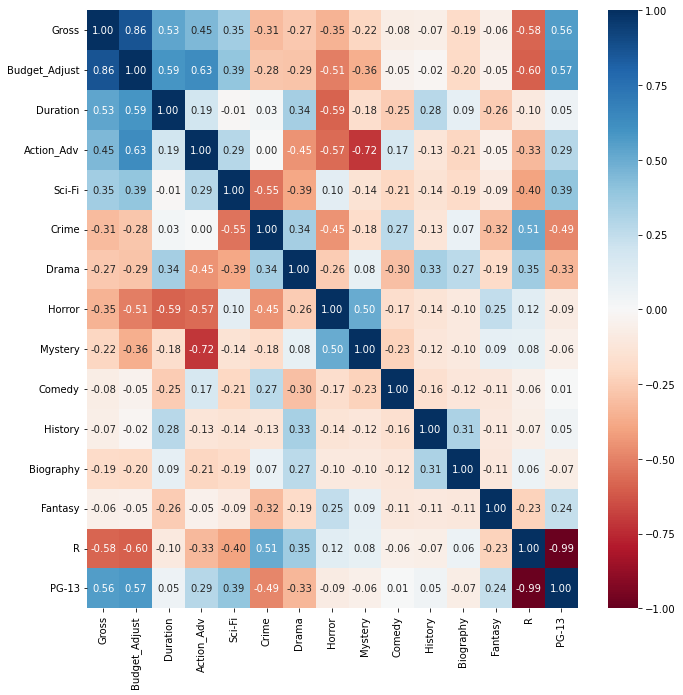

In [41]:
# seaborn correlation heatmap
fig, ax = plt.subplots(figsize=(11,11))
#center set to white - judge positive and negative correlation on equal footing 
#vmin/vmax specifices what values will start and end color map
#fmt tells seaborn how many decimal places we want
sns.heatmap(get_corr.corr(), cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt = '.2f')

In [42]:
sns.set_style('darkgrid')

https://stackoverflow.com/questions/53717543/reduce-number-of-plots-in-sns-pairplot

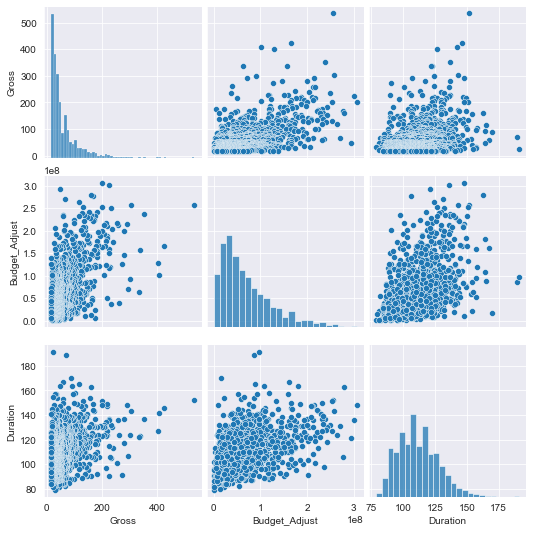

In [43]:
sns.pairplot(first_set, vars = ['Gross', 'Budget_Adjust', 'Duration'])

<AxesSubplot:xlabel='Budget_Adjust', ylabel='Gross'>

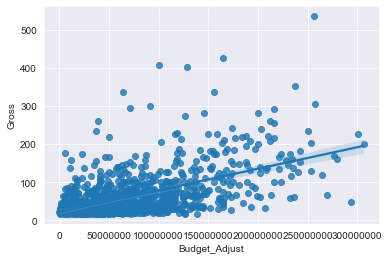

In [44]:
plt.ticklabel_format(style='plain')
sns.set(rc={"figure.figsize":(12, 8)}) #width, height
sns.regplot(x='Budget_Adjust', y='Gross', data=first_set)

Each of those dots is probably visually the width of at least 1,00,000 units on the axis, so anything around or less than that would be difficult to visually distinguish when viewing the chart this "zoomed out